In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

1. Nominal Data
Example Dataset: Titanic Datasets
Two columns are selected i.e Sex and embarked to show nominal datatype


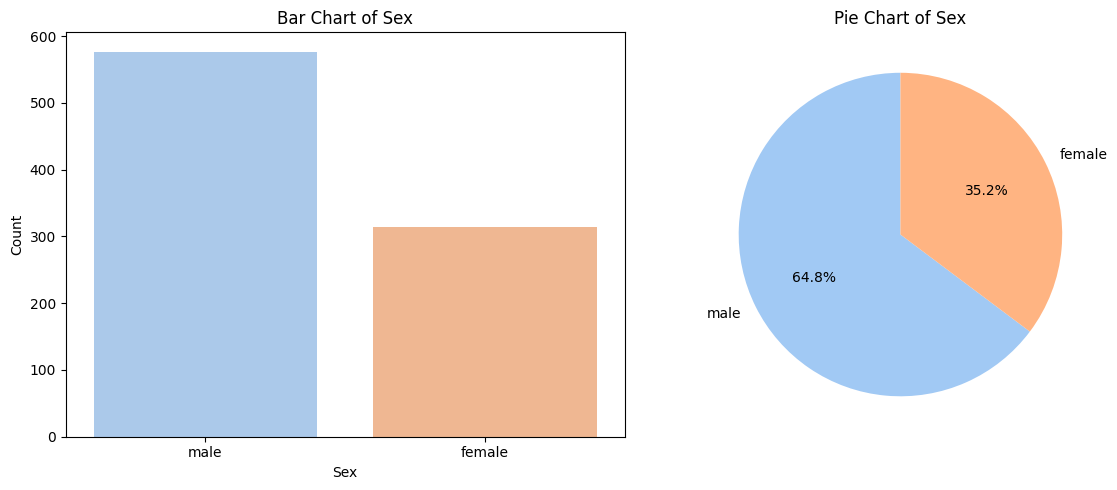

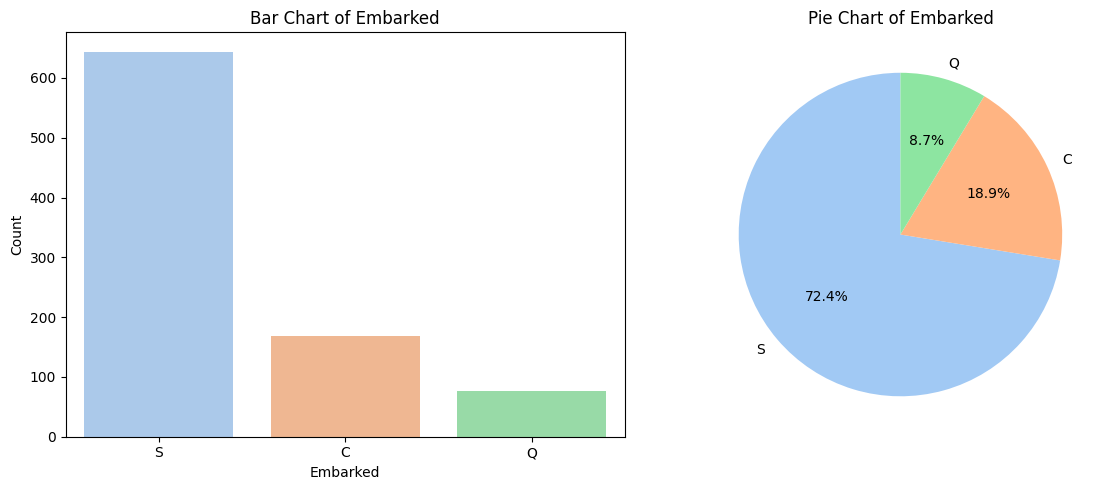

In [3]:
# Loading the dataset and stripping column names of whitespace\

df = pd.read_csv("Titanics.csv")
df.columns = df.columns.str.strip()

# Selecting the nominal columns
nominal_cols = ['Sex', 'Embarked']

# Creating the visualizations
for col in nominal_cols:
    plt.figure(figsize=(12, 5))

    # Bar chart
    plt.subplot(1, 2, 1)
    sns.countplot(x=col, hue=col, data=df, palette='pastel', legend=False)
    plt.title(f'Bar Chart of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

    # Pie chart
    plt.subplot(1, 2, 2)
    df[col].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
    plt.title(f'Pie Chart of {col}')
    plt.ylabel('')  # Hide y-axis label

    plt.tight_layout()
    plt.show()


2. Ordinal Data
Selected Dataset: StudentPerformance
Visualizing using ordered bar chart, strip plot, or stacked bar.

In [4]:
# For display settings

%matplotlib inline
sns.set(style='whitegrid')

# Optional: Set figure size globally
plt.rcParams['figure.figsize'] = (10, 6)

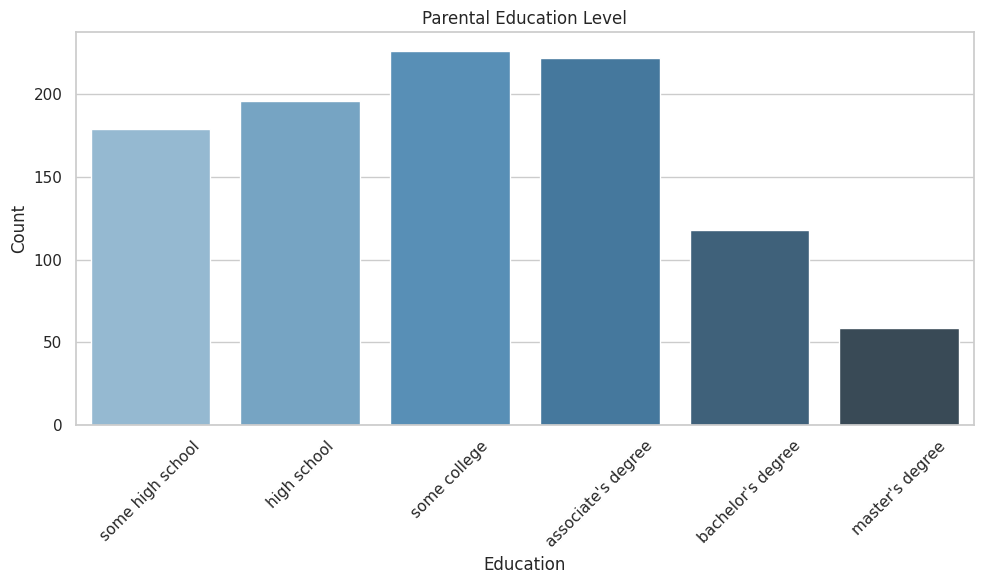

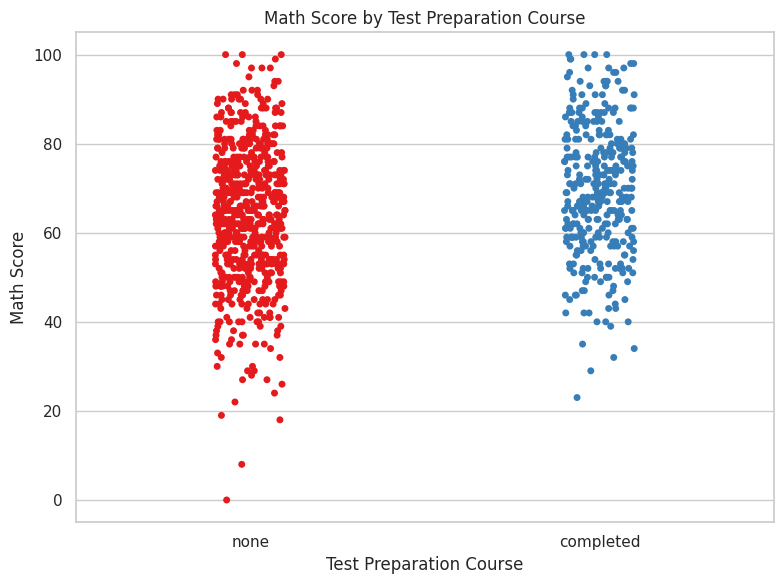

In [10]:
# Load the dataset
df_ordinal = pd.read_csv("StudentsPerformance.csv")

# Define order for parental level of education
education_order = [
    "some high school", "high school", "some college",
    "associate's degree", "bachelor's degree", "master's degree"
]

# Convert to ordered category
df_ordinal['parental level of education'] = pd.Categorical(
    df_ordinal['parental level of education'], categories=education_order, ordered=True
)

# Ordered Bar Chart
plt.figure(figsize=(10, 6))  # Optional: Set figure size for better readability
sns.countplot(data=df_ordinal, x='parental level of education', hue='parental level of education',
              palette='Blues_d', order=education_order, legend=False)
plt.title("Parental Education Level")
plt.xlabel("Education")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Strip Plot by test preparation course
plt.figure(figsize=(8, 6))  # Optional: Set figure size
sns.stripplot(data=df_ordinal, x='test preparation course', y='math score',
              hue='test preparation course', palette='Set1', jitter=True, legend=False)
plt.title("Math Score by Test Preparation Course")
plt.xlabel("Test Preparation Course")
plt.ylabel("Math Score")
plt.tight_layout()
plt.show()

3. Interval Data
Dataset: weatherHistory Dataset
3 Visualization is shown through barchart, linechart and gradient color chart.

datetime64[ns, UTC]


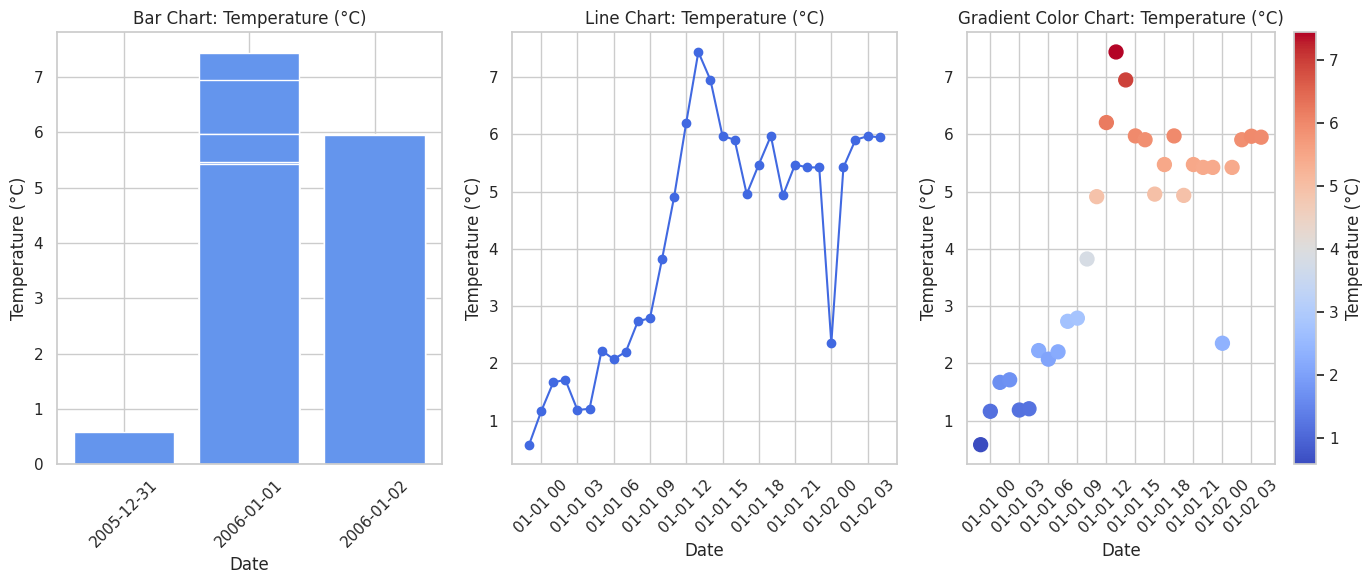

In [11]:
# Load the dataset
df = pd.read_csv('weatherHistory.csv')

# Convert 'Formatted Date' to datetime with UTC standardization
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'], errors='coerce', utc=True)
df = df.dropna(subset=['Formatted Date'])

# Sort by date and select the first 30 rows
df_sorted = df.sort_values('Formatted Date')
data_subset = df_sorted.head(30).copy()  # Use .copy() to avoid SettingWithCopyWarning

# No need to re-convert 'Formatted Date' since it's already datetime64[ns, UTC]
dates = data_subset['Formatted Date']
temps = data_subset['Temperature (C)']

# Verify the dtype
print(dates.dtype)  # Should print: datetime64[ns, UTC]

# Create the visualizations
plt.figure(figsize=(14, 6))

# Bar Chart
plt.subplot(1, 3, 1)
plt.bar(dates.dt.strftime('%Y-%m-%d'), temps, color='cornflowerblue')
plt.xticks(rotation=45)
plt.title('Bar Chart: Temperature (°C)')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')

# Line Chart
plt.subplot(1, 3, 2)
plt.plot(dates, temps, marker='o', color='royalblue')
plt.xticks(rotation=45)
plt.title('Line Chart: Temperature (°C)')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.grid(True)

# Gradient Color Chart
plt.subplot(1, 3, 3)
sc = plt.scatter(dates, temps, c=temps, cmap='coolwarm', s=100)
plt.colorbar(sc, label='Temperature (°C)')
plt.xticks(rotation=45)
plt.title('Gradient Color Chart: Temperature (°C)')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.grid(True)

plt.tight_layout()
plt.show()

4. Ratio Data

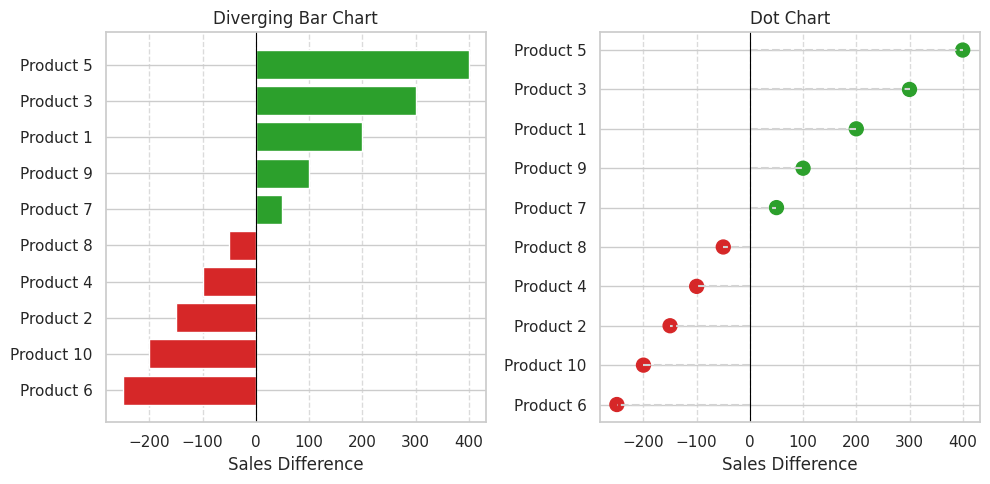

In [12]:


# Sample of quantitative data: Sales difference (positive & negative) from target for 10 products
data = {
    'Product': [f'Product {i}' for i in range(1, 11)],
    'SalesDiff': [200, -150, 300, -100, 400, -250, 50, -50, 100, -200]  # sales difference with true zero baseline
}
df = pd.DataFrame(data)

# Sorting data by SalesDiff for better visuals
df = df.sort_values('SalesDiff')

#Bar Chart
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)

colors = ['#d62728' if x < 0 else '#2ca02c' for x in df['SalesDiff']]
plt.barh(df['Product'], df['SalesDiff'], color=colors)
plt.axvline(0, color='black', linewidth=0.8)
plt.title('Diverging Bar Chart')
plt.xlabel('Sales Difference')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Dot Chart
plt.subplot(1, 3, 2)
plt.hlines(df['Product'], xmin=0, xmax=df['SalesDiff'], color='lightgray', linestyles='dashed')
plt.scatter(df['SalesDiff'], df['Product'], color=colors, s=100)
plt.axvline(0, color='black', linewidth=0.8)
plt.title('Dot Chart')
plt.xlabel('Sales Difference')
plt.grid(axis='x', linestyle='--', alpha=0.7)



plt.tight_layout()
plt.show()
